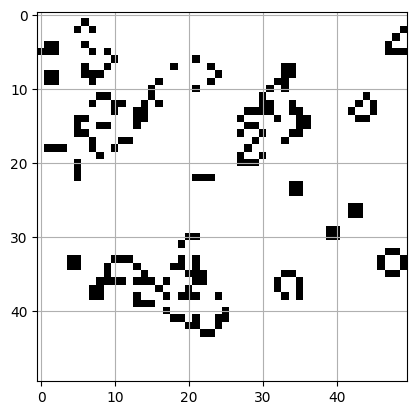

In [1]:
# Importiere die benötigten Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

class GameOfLife:
    def __init__(self, width=50, height=50):
        """
        Initialisiert das Spiel des Lebens mit einer zufälligen Startpopulation.
        
        Parameter:
        width: Breite des Spielfelds
        height: Höhe des Spielfelds
        """
        self.width = width
        self.height = height
        # Erstelle ein zufälliges Gitter mit 15% Wahrscheinlichkeit für lebende Zellen
        self.grid = np.random.choice([0, 1], size=(height, width), p=[0.85, 0.15])
        self.next_grid = self.grid.copy()
    
    def count_neighbors(self, row, col):
        """
        Zählt die Anzahl der lebenden Nachbarzellen für eine gegebene Position.
        Verwendet einen Torus-Effekt an den Rändern.
        """
        total = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                # Berechne die Position der Nachbarzelle mit Torus-Effekt
                neighbor_row = (row + i) % self.height
                neighbor_col = (col + j) % self.width
                total += self.grid[neighbor_row, neighbor_col]
        return total
    
    def update(self):
        """
        Aktualisiert den Zustand aller Zellen nach den Regeln von Conway:
        1. Eine lebende Zelle mit weniger als 2 Nachbarn stirbt (Unterbevölkerung)
        2. Eine lebende Zelle mit 2 oder 3 Nachbarn überlebt
        3. Eine lebende Zelle mit mehr als 3 Nachbarn stirbt (Überbevölkerung)
        4. Eine tote Zelle mit genau 3 Nachbarn wird lebendig (Fortpflanzung)
        """
        for row in range(self.height):
            for col in range(self.width):
                neighbors = self.count_neighbors(row, col)
                cell = self.grid[row, col]
                
                if cell == 1:  # Lebende Zelle
                    if neighbors < 2 or neighbors > 3:
                        self.next_grid[row, col] = 0  # Stirbt
                    else:
                        self.next_grid[row, col] = 1  # Überlebt
                else:  # Tote Zelle
                    if neighbors == 3:
                        self.next_grid[row, col] = 1  # Wird geboren
                    else:
                        self.next_grid[row, col] = 0  # Bleibt tot
        
        # Tausche die Gitter für den nächsten Schritt
        self.grid, self.next_grid = self.next_grid.copy(), self.grid
    
    def display(self):
        """
        Zeigt den aktuellen Zustand des Spiels an.
        Schwarze Zellen sind lebendig, weiße Zellen sind tot.
        """
        plt.clf()
        plt.imshow(self.grid, cmap='binary')
        plt.grid(True)
        plt.show()
    
    def run(self, generations=100, interval=0.1):
        """
        Führt die Simulation für eine bestimmte Anzahl von Generationen aus.
        
        Parameter:
        generations: Anzahl der zu simulierenden Generationen
        interval: Zeitintervall zwischen den Generationen in Sekunden
        """
        for _ in range(generations):
            clear_output(wait=True)  # Lösche die vorherige Ausgabe
            self.display()           # Zeige aktuellen Zustand
            self.update()            # Aktualisiere das Gitter
            plt.pause(interval)      # Pause für Animation

def create_game(width=50, height=50, pattern=None):
    """
    Erstellt ein neues Spiel mit optionalem Startmuster.
    
    Parameter:
    width: Breite des Spielfelds
    height: Höhe des Spielfelds
    pattern: Optionales Startmuster, das in der Mitte platziert wird
    """
    game = GameOfLife(width, height)
    if pattern is not None:
        # Platziere das Muster in der Mitte des Spielfelds
        start_row = height // 2 - pattern.shape[0] // 2
        start_col = width // 2 - pattern.shape[1] // 2
        game.grid[start_row:start_row+pattern.shape[0], 
                 start_col:start_col+pattern.shape[1]] = pattern
    return game

# Definiere bekannte Muster
GLIDER = np.array([
    [0, 1, 0],  # Ein "Gleiter" - ein bekanntes bewegliches Muster
    [0, 0, 1],
    [1, 1, 1]
])

# Starte das Spiel mit einem Gleiter-Muster
game = create_game(pattern=GLIDER)
game.run(generations=100, interval=0.1)